# Problem 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
os.chdir('Downloads')
import warnings 
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [2]:
firm_df=pd.read_csv('Firm_level_data.csv')

In [3]:
firm_df.head()

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [4]:
firm_df=firm_df.set_index('Unnamed: 0')

In [5]:
firm_df.tail()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
Unnamed: 0,,,,,,,,,
754,1253.900196,708.299935,32,412.936157,22.100002,yes,0.697454,267.119487,33.50
755,171.821025,73.666008,1,0.037735,1.684000,no,NaN,228.475701,46.41
756,202.726967,123.926991,13,74.861099,1.460000,no,5.229723,580.430741,42.25
757,785.687944,138.780992,6,0.621750,2.900000,yes,1.625398,309.938651,61.39
758,22.701999,14.244999,5,18.574360,0.197000,no,2.213070,18.940140,7.50


In [6]:
firm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    int64  
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   sp500         759 non-null    object 
 6   tobinq        738 non-null    float64
 7   value         759 non-null    float64
 8   institutions  759 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 59.3+ KB


In [7]:
firm_df.duplicated().sum()

0

In [8]:
firm_df.isnull().sum()

sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

In [9]:
mean=firm_df['tobinq'].mean()
print(mean)

2.794909616151768


In [10]:
firm_df['tobinq']=firm_df['tobinq'].fillna(value=mean)

In [11]:
firm_df.isnull().sum()

sales           0
capital         0
patents         0
randd           0
employment      0
sp500           0
tobinq          0
value           0
institutions    0
dtype: int64

In [12]:
firm_df.sp500.replace(['yes', 'no'],['1','0'], inplace=True)

In [13]:
firm_df.sp500=firm_df.sp500.astype('float64')

In [14]:
firm_df.sp500.value_counts()

0.0    542
1.0    217
Name: sp500, dtype: int64

In [15]:
firm_df.head()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
Unnamed: 0,,,,,,,,,
0,826.995050,161.603986,10,382.078247,2.306000,0.0,11.049511,1625.453755,80.27
1,407.753973,122.101012,2,0.000000,1.860000,0.0,0.844187,243.117082,59.02
2,8407.845588,6221.144614,138,3296.700439,49.659005,1.0,5.205257,25865.233800,47.70
3,451.000010,266.899987,1,83.540161,3.071000,0.0,0.305221,63.024630,26.88
4,174.927981,140.124004,2,14.233637,1.947000,0.0,1.063300,67.406408,49.46


In [16]:
firm_df.tail()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
Unnamed: 0,,,,,,,,,
754,1253.900196,708.299935,32,412.936157,22.100002,1.0,0.697454,267.119487,33.50
755,171.821025,73.666008,1,0.037735,1.684000,0.0,2.794910,228.475701,46.41
756,202.726967,123.926991,13,74.861099,1.460000,0.0,5.229723,580.430741,42.25
757,785.687944,138.780992,6,0.621750,2.900000,1.0,1.625398,309.938651,61.39
758,22.701999,14.244999,5,18.574360,0.197000,0.0,2.213070,18.940140,7.50


In [17]:
firm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    int64  
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   sp500         759 non-null    float64
 6   tobinq        759 non-null    float64
 7   value         759 non-null    float64
 8   institutions  759 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 59.3 KB


In [18]:
firm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sales,759.0,2689.705158,8722.060124,0.138000,122.920000,448.577082,1822.547366,135696.788200
capital,759.0,1977.747498,6466.704896,0.057000,52.650501,202.179023,1075.790020,93625.200560
patents,759.0,25.831357,97.259577,0.000000,1.000000,3.000000,11.500000,1220.000000
randd,759.0,439.938074,2007.397588,0.000000,4.628262,36.864136,143.253403,30425.255860
employment,759.0,14.164519,43.321443,0.006000,0.927500,2.924000,10.050001,710.799925
sp500,759.0,0.285903,0.452141,0.000000,0.000000,0.000000,1.000000,1.000000
tobinq,759.0,2.794910,3.319629,0.119001,1.036000,1.741800,3.082979,20.000000
value,759.0,2732.734750,7071.072362,1.971053,103.593946,410.793529,2054.160386,95191.591160
institutions,759.0,43.020540,21.685586,0.000000,25.395000,44.110000,60.510000,90.150000


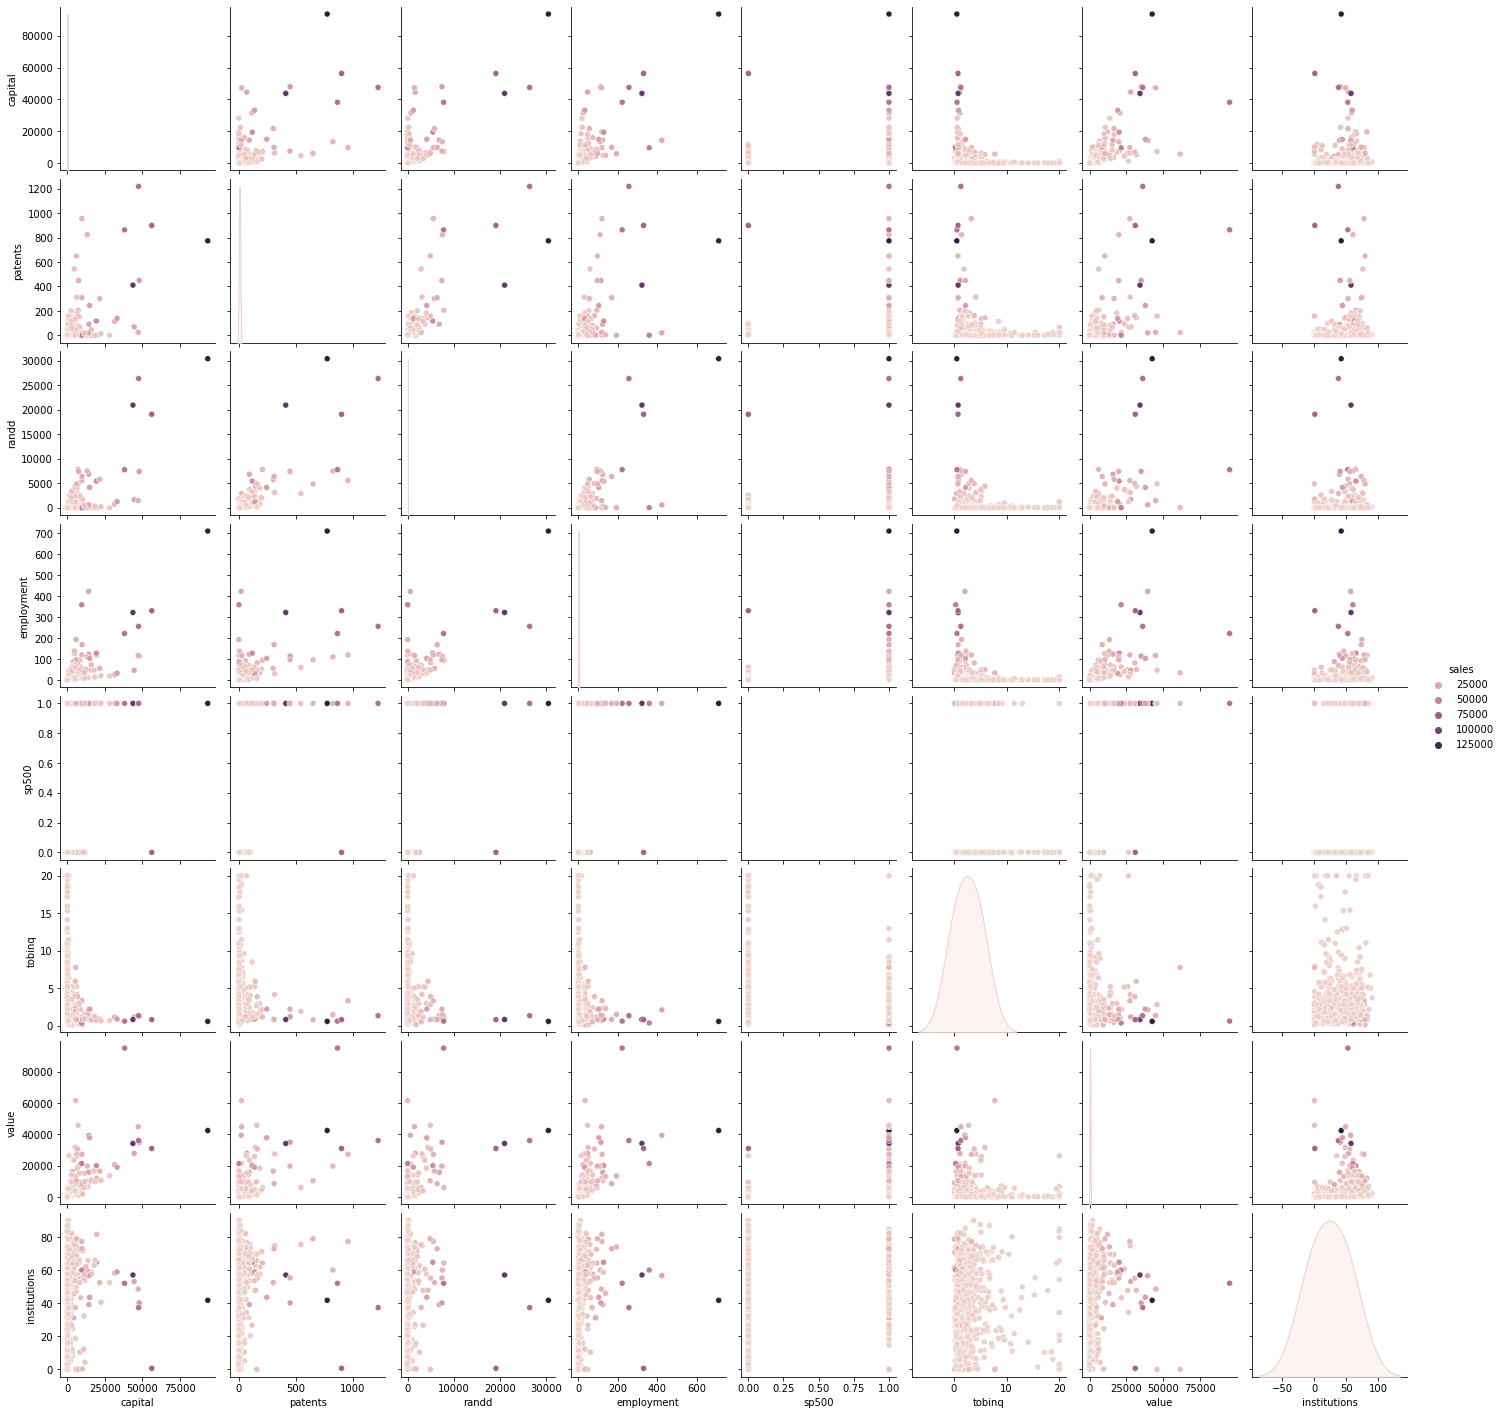

In [19]:
sns.pairplot(firm_df, hue='sales')

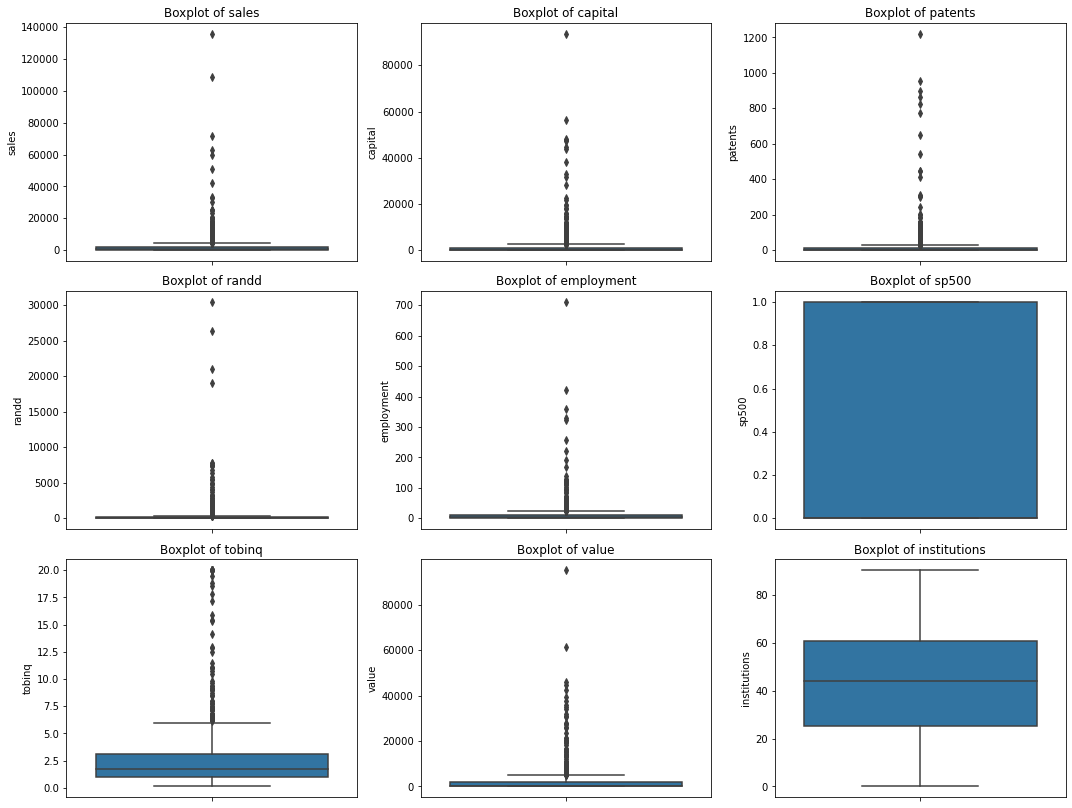

In [20]:
plt.figure(figsize = (15,15))
feature_list = firm_df.columns
for i in range(len(feature_list)):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y = firm_df[feature_list[i]], data =firm_df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [21]:
def remove_outlier(col):
    Q1, Q3= col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range, upper_range

In [22]:
feature_list=firm_df.columns
for i in feature_list:
    LL, UL = remove_outlier(firm_df[i])
    firm_df[i]=np.where(firm_df[i]>UL,UL,firm_df[i])
    firm_df[i]=np.where(firm_df[i]<LL,LL, firm_df[i])

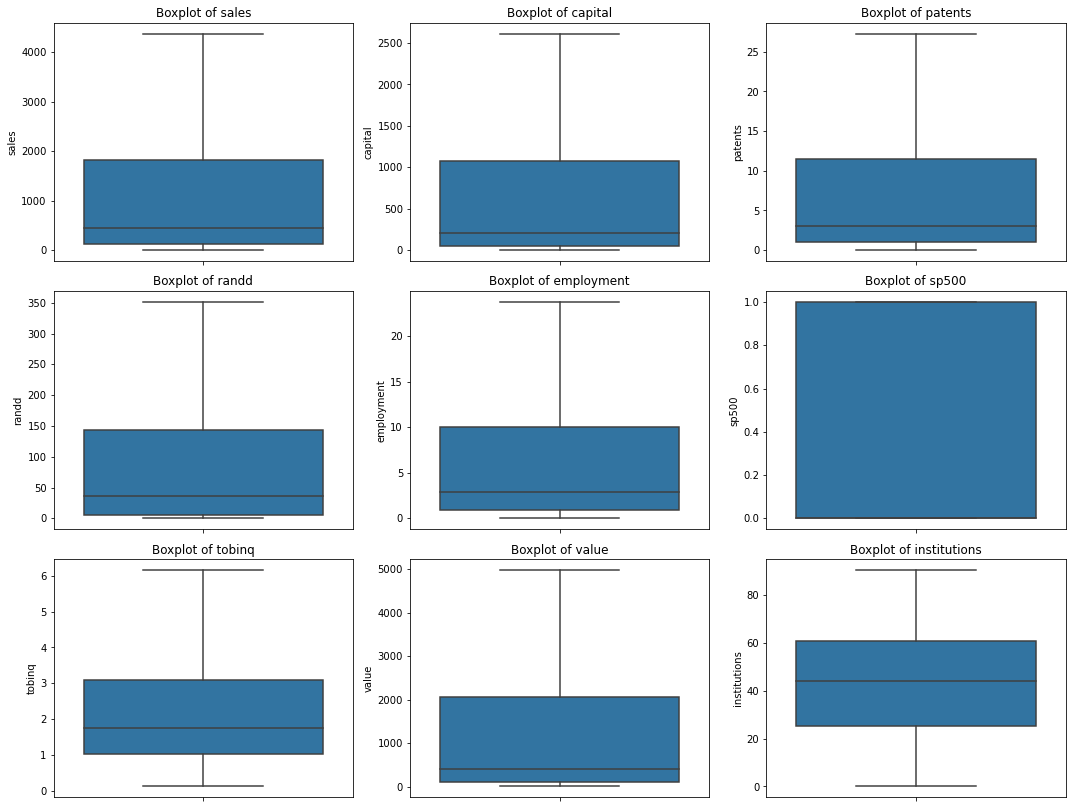

In [23]:
plt.figure(figsize = (15,15))
feature_list = firm_df.columns
for i in range(len(feature_list)):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y = firm_df[feature_list[i]], data =firm_df)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [24]:
firm_df.corr()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
sales,1.000000,0.910306,0.521817,0.622924,0.930732,0.760257,-0.212009,0.895914,0.397912
capital,0.910306,1.000000,0.466951,0.566615,0.854341,0.713219,-0.264513,0.854788,0.343700
patents,0.521817,0.466951,1.000000,0.766115,0.549445,0.479642,0.084227,0.524527,0.337649
randd,0.622924,0.566615,0.766115,1.000000,0.627847,0.549359,0.020307,0.613369,0.334401
employment,0.930732,0.854341,0.549445,0.627847,1.000000,0.751064,-0.222280,0.830223,0.402510
sp500,0.760257,0.713219,0.479642,0.549359,0.751064,1.000000,-0.093706,0.752080,0.442653
tobinq,-0.212009,-0.264513,0.084227,0.020307,-0.222280,-0.093706,1.000000,0.001865,0.024694
value,0.895914,0.854788,0.524527,0.613369,0.830223,0.752080,0.001865,1.000000,0.392292
institutions,0.397912,0.343700,0.337649,0.334401,0.402510,0.442653,0.024694,0.392292,1.000000


<AxesSubplot:>

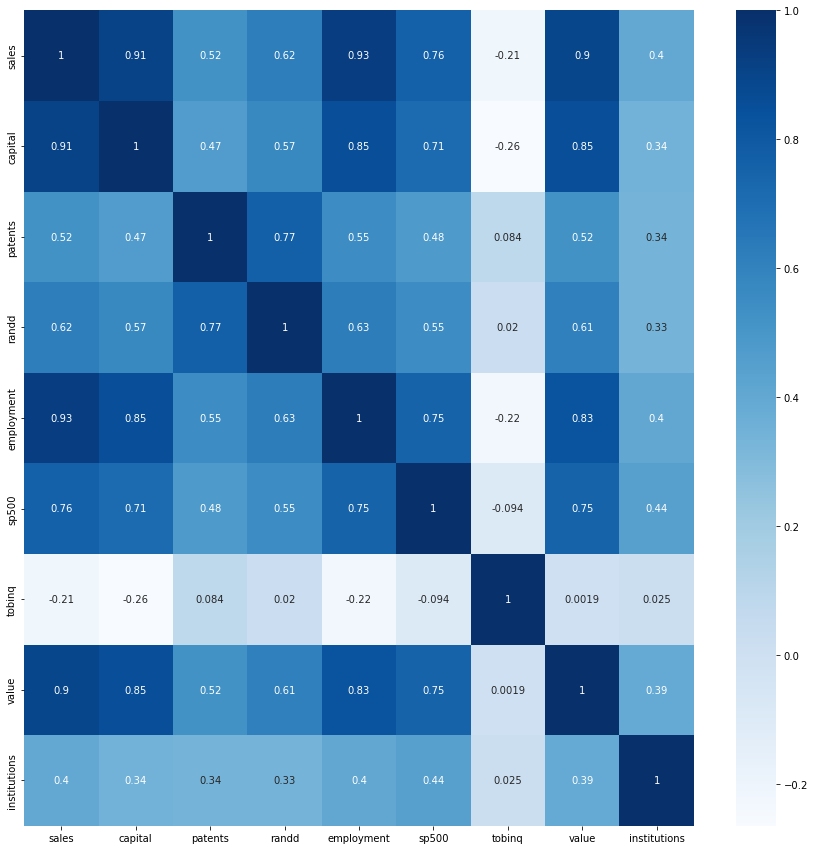

In [25]:
plt.figure(figsize = (15,15))
sns.heatmap(firm_df.corr(),cmap='Blues', annot=True)

In [26]:
x=firm_df.drop('sales',axis='columns')
y=firm_df.pop('sales')

In [27]:
x.head()

,capital,patents,randd,employment,sp500,tobinq,value,institutions
Unnamed: 0,,,,,,,,
0,161.603986,10.00,351.191114,2.306000,0.0,6.153448,1625.453755,80.27
1,122.101012,2.00,0.000000,1.860000,0.0,0.844187,243.117082,59.02
2,2610.499299,27.25,351.191114,23.733752,1.0,5.205257,4980.010044,47.70
3,266.899987,1.00,83.540161,3.071000,0.0,0.305221,63.024630,26.88
4,140.124004,2.00,14.233637,1.947000,0.0,1.063300,67.406408,49.46


In [28]:
y.head()

Unnamed: 0
0     826.995050
1     407.753973
2    4371.988416
3     451.000010
4     174.927981
Name: sales, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler=StandardScaler()

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.30, random_state=1)

In [35]:
import statsmodels.api as sm

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
x_con=sm.add_constant(x)

In [38]:
x_trainc, x_testc, y_trainc, y_testc=train_test_split(x_con, y, test_size=0.30, random_state=1)

In [39]:
model=sm.OLS(y_trainc,x_trainc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     952.4
Date:                Sat, 31 Dec 2022   Prob (F-statistic):          1.05e-305
Time:                        21:19:25   Log-Likelihood:                -3927.7
No. Observations:                 531   AIC:                             7873.
Df Residuals:                     522   BIC:                             7912.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           72.8311     49.039      1.485      0.138     -23.507     169.170
capital          0.4062      0.042      9.651      0.000       0.323       0.489
patents         -4.6473      2.789     -1.666      0.096     -10.127       0.833
randd            0.6399      0.232      2.753      0.006       0.183       1.096
employment      78.6137      4.765     16.498      0.000      69.252      87.975
sp500          166.1321     66.504      2.498      0.013      35.483     296.781
tobinq         -39.9258     12.145     -3.288      0.001     -63.784     -16.067
value            0.2446      0.026      9.592      0.000       0.195       0.295
institutions     0.2174      0.902      0.241      0.810      -1.555       1.990
==============================================================================
Omnibus:                      185.527   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1284.253
Skew:                           1.351   Prob(JB):                    1.34e-279
Kurtosis:                      10.123   Cond. No.                     9.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
print('The variation in the independent variable which is explained by the dependent variable is',round(model.rsquared*100,4),'%')

The variation in the independent variable which is explained by the dependent variable is 93.5881 %


In [41]:
ypred = model.predict(x_testc)
ypred.head()

Unnamed: 0
480     184.990818
622     385.340359
638    2600.067272
389     145.302691
748     560.454588
dtype: float64

In [42]:
print("The Root Mean Square Error (RMSE) of the model is for the training set is",mean_squared_error(model.fittedvalues,y_trainc,squared=False))

The Root Mean Square Error (RMSE) of the model is for the training set is 394.6129494572075


In [43]:
model.predict(x_trainc)

Unnamed: 0
626    2365.947440
333     112.040321
257     954.976216
173    1641.749174
242     369.011778
          ...     
645    1621.823500
715     508.420537
72      200.526019
235     105.106985
37      448.640450
Length: 531, dtype: float64

In [44]:
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(y_test,ypred)))

The Root Mean Square Error (RMSE) of the model is for testing set is 399.74321332112726


In [45]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [46]:
print('The coefficient of determination R^2 of the prediction on Train set',regression_model.score(x_train, y_train))

The coefficient of determination R^2 of the prediction on Train set 0.9358806629736066


In [47]:
print('The coefficient of determination R^2 of the prediction on Test set',regression_model.score(x_test, y_test))

The coefficient of determination R^2 of the prediction on Test set 0.924129439335239


In [48]:
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(y_test,regression_model.predict(x_test))))

The Root Mean Square Error (RMSE) of the model is for testing set is 399.743213321128


In [49]:
vif = [variance_inflation_factor(x.values, ix) for ix in range(x.shape[1])] 

In [50]:
i=0
for column in x.columns:
    if i < 15:
        print (column ,"--->",  vif[i])
        i = i+1

capital ---> 8.594129880100176
patents ---> 4.115963077714671
randd ---> 4.715060025092686
employment ---> 8.834219233844008
sp500 ---> 3.7643010848794525
tobinq ---> 2.753243492679157
value ---> 9.114377911549704
institutions ---> 3.96259424309343


# Problem 2

In [51]:
car_df=pd.read_csv('Car_Crash.csv')

In [52]:
car_df.head()

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
1,1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4.0,2:17:1
2,2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,unavail,driver,0,4.0,2:79:1
3,3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,unavail,pass,0,4.0,2:79:1
4,4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,unavail,driver,0,4.0,4:58:1


In [53]:
car_df.tail()

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
11212,11212,25-39,3179.688,survived,none,belted,1,m,17,2002,1985.0,unavail,driver,0,0.0,82:107:1
11213,11213,10-24,71.228,survived,airbag,belted,1,m,54,2002,2002.0,nodeploy,driver,0,2.0,82:108:2
11214,11214,10-24,10.474,survived,airbag,belted,1,f,27,2002,1990.0,deploy,driver,1,3.0,82:110:1
11215,11215,25-39,10.474,survived,airbag,belted,1,f,18,2002,1999.0,deploy,driver,1,0.0,82:110:2
11216,11216,25-39,10.474,survived,airbag,belted,1,m,17,2002,1999.0,deploy,pass,1,0.0,82:110:2


In [54]:
car_df.describe()

,Unnamed: 0,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity
count,11217.000000,11217.000000,11217.000000,11217.000000,11217.000000,11217.000000,11217.000000,11140.000000
mean,5608.000000,431.405309,0.644022,37.427654,2001.103236,1994.177944,0.389141,1.825583
std,3238.213319,1406.202941,0.478830,18.192429,1.056805,5.658704,0.487577,1.378535
min,0.000000,0.000000,0.000000,16.000000,1997.000000,1953.000000,0.000000,0.000000
25%,2804.000000,28.292000,0.000000,22.000000,2001.000000,1991.000000,0.000000,1.000000
50%,5608.000000,82.195000,1.000000,33.000000,2001.000000,1995.000000,0.000000,2.000000
75%,8412.000000,324.056000,1.000000,48.000000,2002.000000,1999.000000,1.000000,3.000000
max,11216.000000,31694.040000,1.000000,97.000000,2002.000000,2003.000000,1.000000,5.000000


In [55]:
car_df.shape

(11217, 16)

In [56]:
car_df=car_df.set_index('Unnamed: 0')

In [57]:
car_df.occRole.replace(['driver', 'pass'],['1','0'], inplace=True)
car_df.Survived.replace(['survived', 'Not_Survived'],['1','0'], inplace=True)
car_df.airbag.replace(['airbag', 'none'],['1','0'], inplace=True)
car_df.seatbelt.replace(['belted', 'none'],['1','0'], inplace=True)
car_df.sex.replace(['m', 'f'],['1','0'], inplace=True)
car_df.abcat.replace(['nodeploy', 'unavail', 'deploy'],['0','1','2'], inplace=True)
car_df.sex.replace(['m', 'f'],['1','0'], inplace=True)
car_df.dvcat.replace(['1-9km/h', '55+','40-54','25-39','10-24'],['4','3','2','1','0'], inplace=True)

In [58]:
for column in car_df.columns:
    if car_df[column].dtype == 'object':
        print(column.upper(),': ',car_df[column].nunique())
        print(car_df[column].value_counts().sort_values())
        print('\n')

DVCAT :  5
4     282
3     809
2    1344
1    3368
0    5414
Name: dvcat, dtype: int64


SURVIVED :  2
0     1180
1    10037
Name: Survived, dtype: int64


AIRBAG :  2
0    4153
1    7064
Name: airbag, dtype: int64


SEATBELT :  2
0    3368
1    7849
Name: seatbelt, dtype: int64


SEX :  2
0    5169
1    6048
Name: sex, dtype: int64


ABCAT :  3
0    2699
1    4153
2    4365
Name: abcat, dtype: int64


OCCROLE :  2
0    2431
1    8786
Name: occRole, dtype: int64


CASEID :  6488
2:95:1      1
45:49:1     1
45:88:1     1
45:42:2     1
45:34:1     1
           ..
74:58:1     6
49:106:1    6
75:84:2     6
74:74:2     6
73:100:2    7
Name: caseid, Length: 6488, dtype: int64




In [59]:
car_df=car_df.drop('caseid',axis='columns')

In [60]:
car_df.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity
Unnamed: 0,,,,,,,,,,,,,,
0,3,27.078,0,0,0,1,1,32,1997,1987.0,1,1,0,4.0
1,1,89.627,0,1,1,0,0,54,1997,1994.0,0,1,0,4.0
2,3,27.078,0,0,1,1,1,67,1997,1992.0,1,1,0,4.0
3,3,27.078,0,0,1,1,0,64,1997,1992.0,1,0,0,4.0
4,3,13.374,0,0,0,1,1,23,1997,1986.0,1,1,0,4.0


In [61]:
car_df.isnull().sum()


dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
abcat           0
occRole         0
deploy          0
injSeverity    77
dtype: int64

In [62]:
car_df=car_df.dropna()

In [63]:
car_df.isnull().sum()

dvcat          0
weight         0
Survived       0
airbag         0
seatbelt       0
frontal        0
sex            0
ageOFocc       0
yearacc        0
yearVeh        0
abcat          0
occRole        0
deploy         0
injSeverity    0
dtype: int64

In [64]:
car_df.shape

(11140, 14)

In [65]:
car_df['Survived']=car_df['Survived'].astype('float64')
car_df['dvcat']=car_df['dvcat'].astype('float64')
car_df['airbag']=car_df['airbag'].astype('float64')
car_df['seatbelt']=car_df['seatbelt'].astype('float64')
car_df['sex']=car_df['sex'].astype('float64')
car_df['abcat']=car_df['abcat'].astype('float64')
car_df['occRole']=car_df['occRole'].astype('float64')

In [66]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11140 entries, 0 to 11216
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11140 non-null  float64
 1   weight       11140 non-null  float64
 2   Survived     11140 non-null  float64
 3   airbag       11140 non-null  float64
 4   seatbelt     11140 non-null  float64
 5   frontal      11140 non-null  int64  
 6   sex          11140 non-null  float64
 7   ageOFocc     11140 non-null  int64  
 8   yearacc      11140 non-null  int64  
 9   yearVeh      11140 non-null  float64
 10  abcat        11140 non-null  float64
 11  occRole      11140 non-null  float64
 12  deploy       11140 non-null  int64  
 13  injSeverity  11140 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 1.3 MB


In [67]:
car_df.Survived.value_counts()

1.0    9960
0.0    1180
Name: Survived, dtype: int64

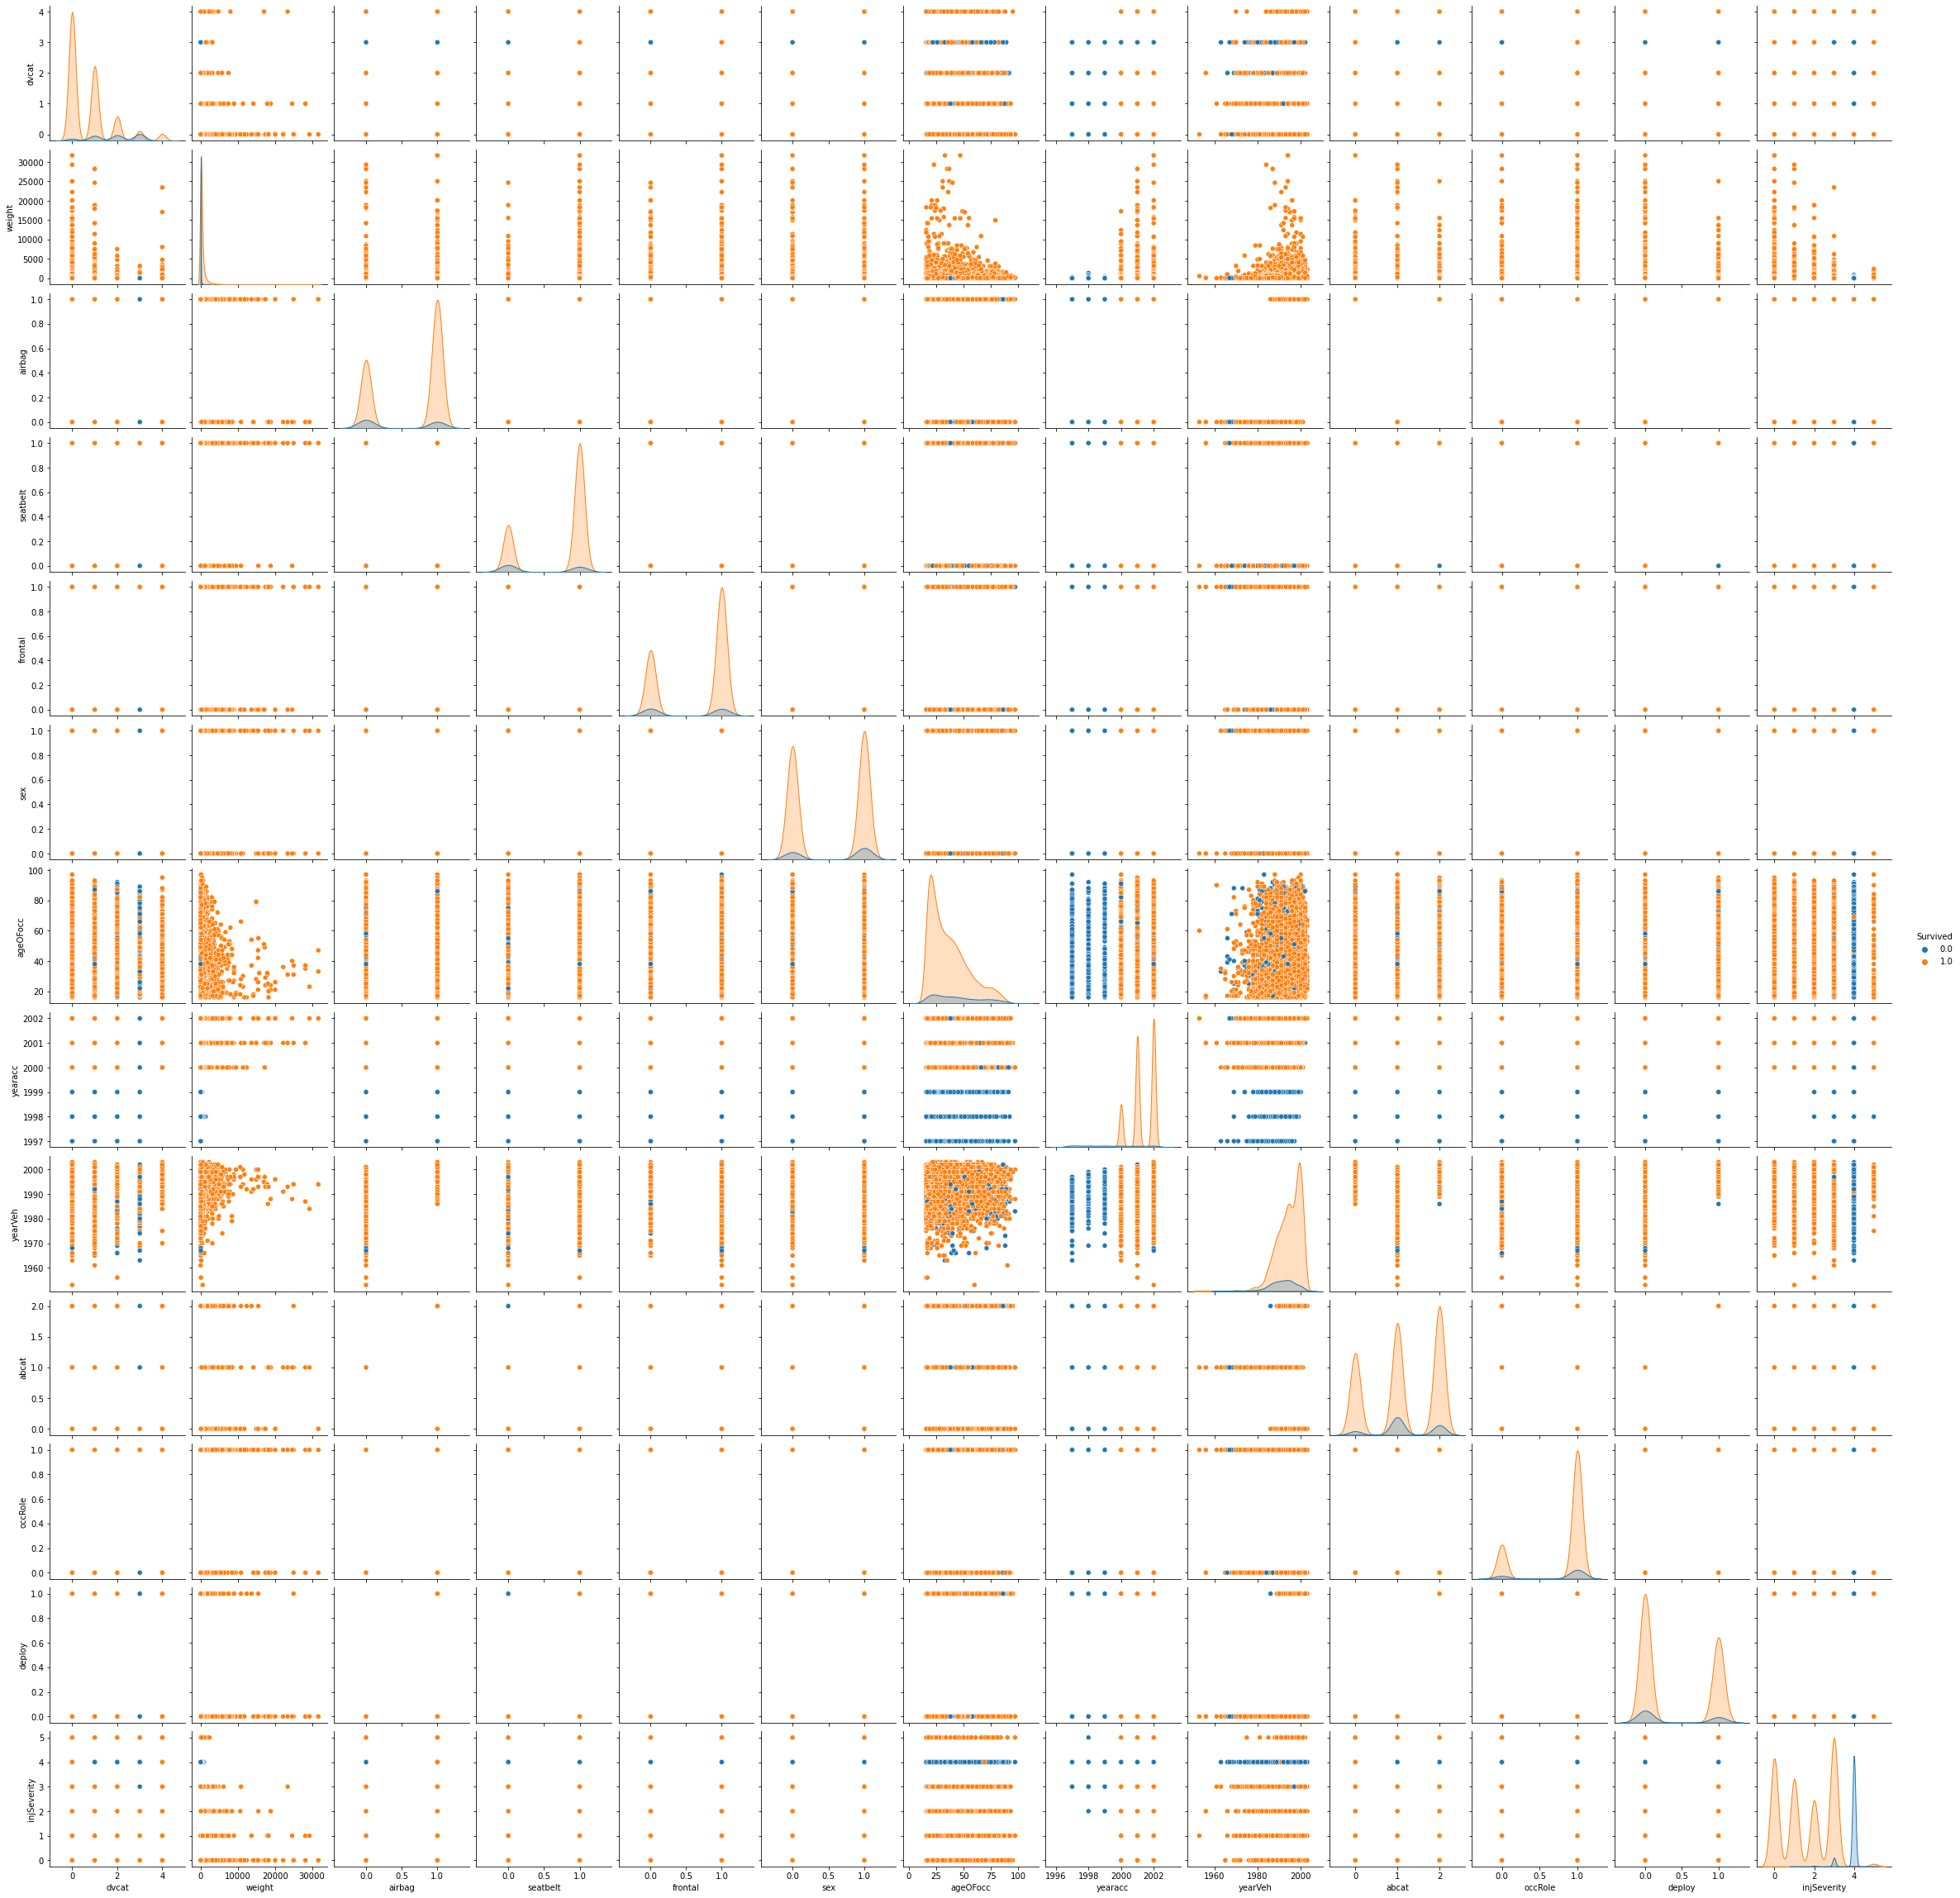

In [68]:
sns.pairplot(car_df, hue='Survived')

In [69]:
car_df.corr()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity
dvcat,1.000000,-0.108490,-0.344907,-0.110232,-0.152805,-0.015763,0.068071,-0.032797,-0.188581,-0.109838,0.061971,0.016481,-0.005067,0.360932
weight,-0.108490,1.000000,0.091653,-0.003219,0.078789,0.000812,-0.006855,-0.039758,0.056898,-0.014659,-0.080264,0.000239,-0.065719,-0.221548
Survived,-0.344907,0.091653,1.000000,0.140111,0.206829,0.108237,-0.046769,-0.135984,0.550349,0.165410,-0.018087,0.025863,0.054920,-0.521149
airbag,-0.110232,-0.003219,0.140111,1.000000,0.156567,-0.049553,-0.093186,0.024451,0.182687,0.766316,0.147376,0.087758,0.612850,-0.125363
seatbelt,-0.152805,0.078789,0.206829,0.156567,1.000000,-0.066324,-0.117493,0.068832,0.149020,0.179276,-0.042054,0.050961,0.043920,-0.285476
frontal,-0.015763,0.000812,0.108237,-0.049553,-0.066324,1.000000,0.056011,-0.049831,0.059040,-0.023800,0.356063,0.034493,0.259933,-0.054406
sex,0.068071,-0.006855,-0.046769,-0.093186,-0.117493,0.056011,1.000000,-0.061579,-0.026283,-0.097391,0.011524,0.116618,-0.036930,-0.021638
ageOFocc,-0.032797,-0.039758,-0.135984,0.024451,0.068832,-0.049831,-0.061579,1.000000,-0.071955,-0.002253,-0.028137,0.051119,-0.010373,0.124818
yearacc,-0.188581,0.056898,0.550349,0.182687,0.149020,0.059040,-0.026283,-0.071955,1.000000,0.248893,0.001225,0.020937,0.091428,-0.303407
yearVeh,-0.109838,-0.014659,0.165410,0.766316,0.179276,-0.023800,-0.097391,-0.002253,0.248893,1.000000,0.092477,0.021291,0.453291,-0.140118


<AxesSubplot:>

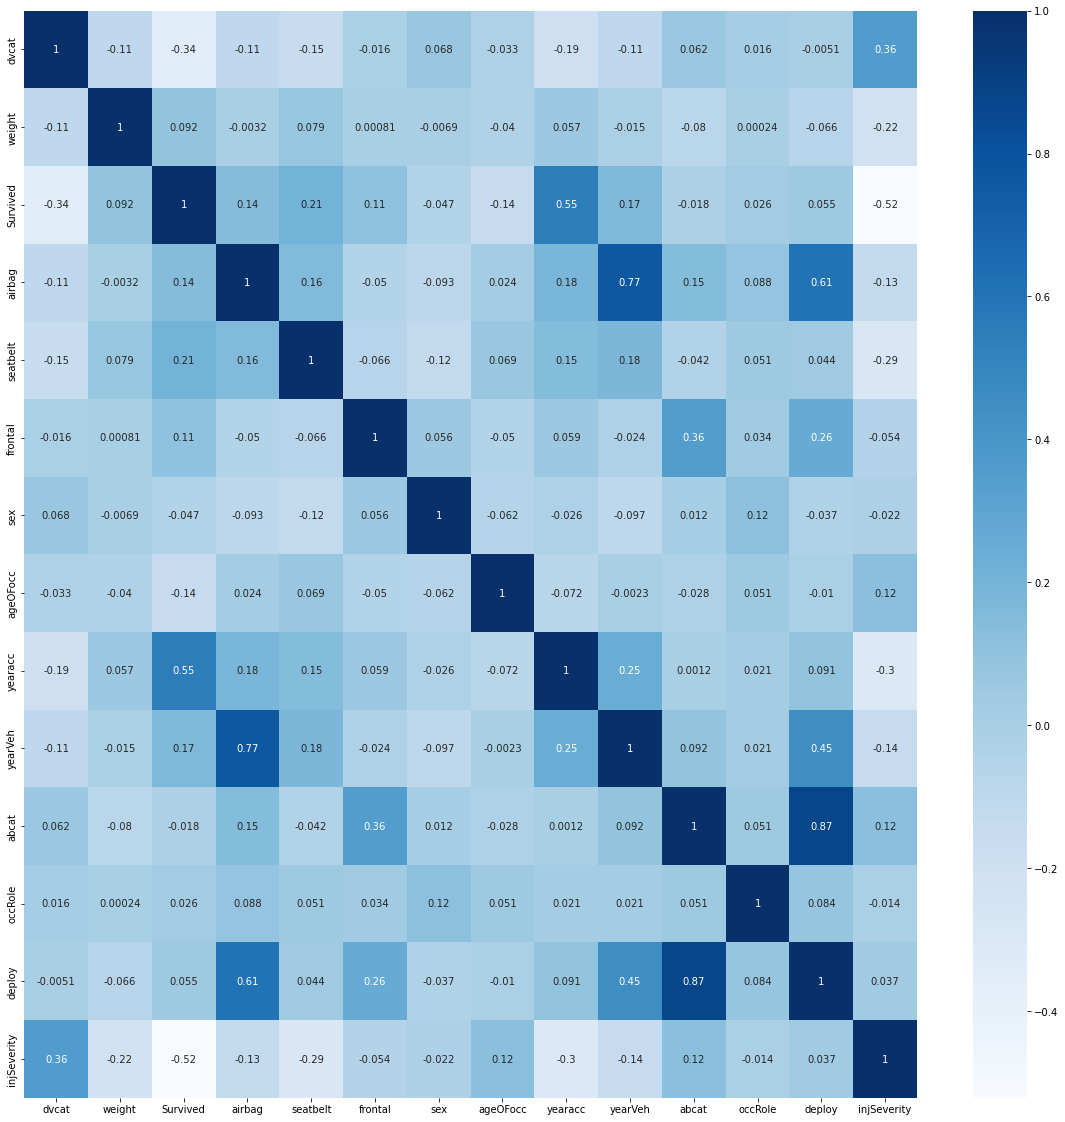

In [70]:
plt.figure(figsize=(20,20))
sns.heatmap(car_df.corr(), cmap='Blues', annot=True)

In [71]:
X=car_df.drop('Survived', axis='columns')

In [72]:
Y=car_df.pop('Survived')

In [73]:
X.head()

,dvcat,weight,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity
Unnamed: 0,,,,,,,,,,,,,
0,3.0,27.078,0.0,0.0,1,1.0,32,1997,1987.0,1.0,1.0,0,4.0
1,1.0,89.627,1.0,1.0,0,0.0,54,1997,1994.0,0.0,1.0,0,4.0
2,3.0,27.078,0.0,1.0,1,1.0,67,1997,1992.0,1.0,1.0,0,4.0
3,3.0,27.078,0.0,1.0,1,0.0,64,1997,1992.0,1.0,0.0,0,4.0
4,3.0,13.374,0.0,0.0,1,1.0,23,1997,1986.0,1.0,1.0,0,4.0


In [74]:
Y.head()

Unnamed: 0
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Survived, dtype: float64

In [75]:
X_train, X_test,Y_train, Y_test=train_test_split(X,Y,test_size=0.30, random_state=42)

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
model=LogisticRegression()

In [78]:
Y_train.value_counts()

1.0    6979
0.0     819
Name: Survived, dtype: int64

In [79]:
Y_test.value_counts()

1.0    2981
0.0     361
Name: Survived, dtype: int64

In [80]:
model.fit(X_train,Y_train)

LogisticRegression()

In [81]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [82]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,1.362528e-01,0.863747
1,9.196487e-01,0.080351
2,3.290299e-04,0.999671
3,1.438443e-09,1.000000
4,1.378803e-04,0.999862


In [83]:
# Accuracy - Training Data
model.score(X_train, Y_train)

0.9846114388304693

AUC: 0.986


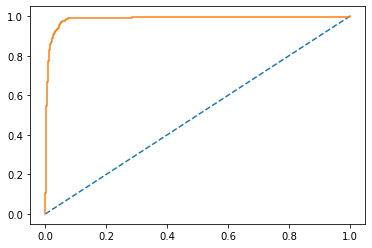

In [84]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [85]:
# Accuracy - Test Data
model.score(X_test, Y_test)

0.9802513464991023

AUC: 0.986


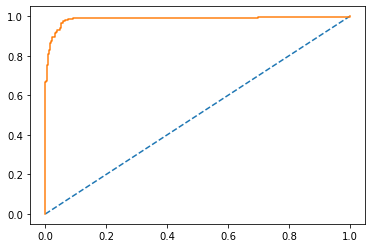

In [86]:


# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);



In [87]:
## Confusion matrix on the training data


print('Confusion Matrix','\n',metrics.confusion_matrix(Y_train, ytrain_predict),'\n')
print('Classification Report','\n',metrics.classification_report(Y_train,ytrain_predict))



Confusion Matrix 
 [[ 751   68]
 [  52 6927]] 

Classification Report 
               precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       819
         1.0       0.99      0.99      0.99      6979

    accuracy                           0.98      7798
   macro avg       0.96      0.95      0.96      7798
weighted avg       0.98      0.98      0.98      7798



In [88]:
## Confusion matrix on the test data

print('Confusion Matrix','\n',metrics.confusion_matrix(Y_test, ytest_predict),'\n')
print('Classification Report','\n',metrics.classification_report(Y_test,ytest_predict))


Confusion Matrix 
 [[ 322   39]
 [  27 2954]] 

Classification Report 
               precision    recall  f1-score   support

         0.0       0.92      0.89      0.91       361
         1.0       0.99      0.99      0.99      2981

    accuracy                           0.98      3342
   macro avg       0.95      0.94      0.95      3342
weighted avg       0.98      0.98      0.98      3342



### LDA

In [89]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [90]:
clf = LinearDiscriminantAnalysis()
lda=clf.fit(X,Y)
lda

LinearDiscriminantAnalysis()

In [91]:
lda_fit=lda.fit_transform(X,Y)

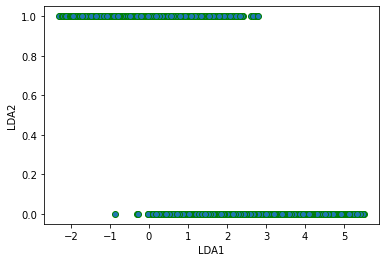

In [92]:
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.scatter(lda_fit[:,0], Y,cmap='rainbow',edgecolors='g',alpha=1)

In [93]:
# Predict it

pred_class = model.predict(X)
car_df['Prediction'] = pred_class 

In [94]:
car_df.head()

,dvcat,weight,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,Prediction
Unnamed: 0,,,,,,,,,,,,,,
0,3.0,27.078,0.0,0.0,1,1.0,32,1997,1987.0,1.0,1.0,0,4.0,0.0
1,1.0,89.627,1.0,1.0,0,0.0,54,1997,1994.0,0.0,1.0,0,4.0,0.0
2,3.0,27.078,0.0,1.0,1,1.0,67,1997,1992.0,1.0,1.0,0,4.0,0.0
3,3.0,27.078,0.0,1.0,1,0.0,64,1997,1992.0,1.0,0.0,0,4.0,0.0
4,3.0,13.374,0.0,0.0,1,1.0,23,1997,1986.0,1.0,1.0,0,4.0,0.0


In [95]:
confusion_matrix(Y, pred_class)

array([[1073,  107],
       [  79, 9881]], dtype=int64)

In [96]:
print(classification_report(Y, pred_class))

              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92      1180
         1.0       0.99      0.99      0.99      9960

    accuracy                           0.98     11140
   macro avg       0.96      0.95      0.96     11140
weighted avg       0.98      0.98      0.98     11140



In [97]:
coef=lda.coef_
coef

array([[-8.56124065e-01, -1.15094067e-04,  1.98610840e-01,
         4.91796477e-01,  8.03095653e-01, -4.90691716e-01,
        -2.51344580e-02,  2.38478160e+00, -2.61689016e-02,
        -3.79643636e-03,  2.71765604e-01,  9.08896368e-02,
        -1.46401345e+00]])

In [98]:
lda.intercept_

array([-4710.73716901])

AUC: 0.986


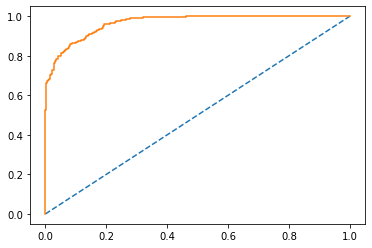

In [99]:

# predict probabilities
probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

